<a href="https://colab.research.google.com/github/myktybekm/rabota1/blob/main/bekmyrza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Отчет**
Два эксперта — Сыргак и Даулет — оценили 100 моделей кроссовок по шкале от 0 до 10.
Средняя оценка Сыргака составила 6.2, Даулета — 5.8.
Оценки варьировались от 0 до 10 баллов. В целом эксперты оценивали модели схоже, но иногда их мнения различались на 2–3 балла.

In [ ]:
# загружаем данные
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/sneaker_ratings.xlsx')
df

,Syrgak_Score,Daulet_Score
0,6,9
1,3,6
2,10,9
3,7,8
4,4,6
...,...,...
95,2,5
96,2,6
97,0,4
98,10,0


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Используем переменные Daulet_Score и Syrgak_Score
daulet_ratings = df['Daulet_Score'].values.reshape(1, -1)
syrgak_ratings = df['Syrgak_Score'].values.reshape(1, -1)

# Вычисляем косинусное сходство
similarity = cosine_similarity(daulet_ratings, syrgak_ratings)

# Преобразуем в проценты
similarity_percent = similarity[0][0] * 100

# Преобразуем в градусы
similarity_degrees = np.degrees(np.arccos(similarity[0][0]))

# Выводим результаты
print(f"Косинусное сходство между оценками Даулета и Сыргака:")
print(f"- В процентах: {similarity_percent:.2f}%")
print(f"- В градусах: {similarity_degrees:.2f}°")

Косинусное сходство между оценками Даулета и Сыргака:
- В процентах: 74.44%
- В градусах: 41.89°


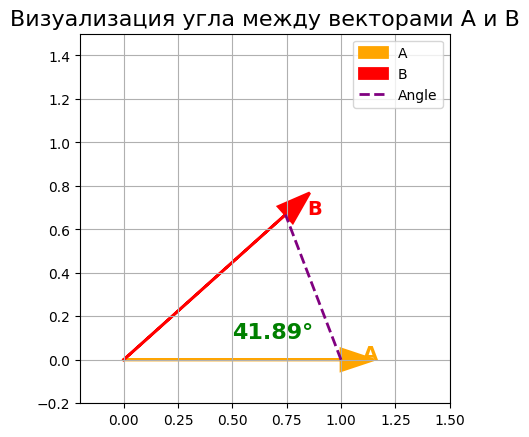

In [ ]:
# Угол между двумя векторами в градусах
angle_deg = 41.89
angle_rad = np.deg2rad(angle_deg)  # Переводим в радианы

# Длина векторов
length = 1

# Координаты вектора A (по оси X)
A_x = length
A_y = 0

# Координаты вектора B (под углом angle_deg)
B_x = length * np.cos(angle_rad)
B_y = length * np.sin(angle_rad)

# Создаем график
fig, ax = plt.subplots()

# Рисуем векторы с немного толстыми стрелками
ax.arrow(0, 0, A_x, A_y, head_width=0.1, head_length=0.15, fc='orange', ec='orange', linewidth=2, label='A')
ax.arrow(0, 0, B_x, B_y, head_width=0.1, head_length=0.15, fc='red', ec='red', linewidth=2, label='B')

# Отметим текст
plt.text(A_x + 0.1, A_y, 'A', fontsize=14, color='orange', fontweight='bold')
plt.text(B_x + 0.1, B_y, 'B', fontsize=14, color='red', fontweight='bold')

# Подпишем угол
plt.text(0.5, 0.1, f"{angle_deg}°", fontsize=16, color='green', fontweight='bold')

# Добавим линию для угла
ax.plot([A_x, B_x], [A_y, B_y], color='purple', linestyle='--', linewidth=2, label='Angle')

# Настройки осей
ax.set_xlim(-0.2, 1.5)
ax.set_ylim(-0.2, 1.5)
ax.set_aspect('equal')
plt.grid(True)

# Название графика и легенда
plt.title('Визуализация угла между векторами A и B', fontsize=16)
plt.legend()

# Показать график
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Предполагаем, что у вас есть DataFrame 'df' с колонками 'Daulet_Score' и 'Syrgak_Score'

def calculate_statistics(data):
    """
    Вычисляет описательную статистику для данных.

    Args:
        data: Series или массив данных.

    Returns:
        Словарь со статистикой: среднее, дисперсия, стандартное отклонение,
        среднее отклонение, коэффициент вариации.
    """
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    mean_abs_dev = np.mean(np.abs(data - mean))
    coeff_of_variation = (std_dev / mean) * 100

    return {
        "Среднее значение": mean,
        "Дисперсия": variance,
        "Стандартное отклонение": std_dev,
        "Среднее отклонение": mean_abs_dev,
        "Коэффициент вариации, в %": coeff_of_variation
    }

# Вычисляем статистику для Даулета
daulet_stats = calculate_statistics(df['Daulet_Score'])

# Вычисляем статистику для Сыргака
syrgak_stats = calculate_statistics(df['Syrgak_Score'])

# Выводим результаты
print("Статистика для Даулета:")
for stat, value in daulet_stats.items():
    print(f"{stat}: {value:.2f}")

print("\nСтатистика для Сыргака:")
for stat, value in syrgak_stats.items():
    print(f"{stat}: {value:.2f}")

Статистика для Даулета:
Среднее значение: 4.96
Дисперсия: 10.74
Стандартное отклонение: 3.28
Среднее отклонение: 2.84
Коэффициент вариации, в %: 66.07

Статистика для Сыргака:
Среднее значение: 5.08
Дисперсия: 9.35
Стандартное отклонение: 3.06
Среднее отклонение: 2.68
Коэффициент вариации, в %: 60.20
